<a href="https://colab.research.google.com/github/TRANTHITHUYTIEN20104061/Tr-n-Th-Th-y-Ti-n-20104061/blob/main/project_Ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Đúc là một quá trình sản xuất trong đó vật liệu chất lỏng được đổ vào khuôn để đông cứng.
 #Nhiều loại khiếm khuyết hoặc bất thường không mong muốn có thể xảy ra trong quá trình này. 
 #Ngành công nghiệp có bộ phận kiểm tra chất lượng để loại bỏ các sản phẩm bị lỗi khỏi dây chuyền sản xuất, 
# nhưng điều này rất tốn thời gian vì nó được thực hiện thủ công. Hơn nữa, có cơ hội phân loại sai do lỗi của con người, gây ra từ chối toàn bộ thứ tự sản phẩm
#chúng ta hãy tự động hóa quá trình kiểm tra bằng cách đào tạo hình ảnh quan điểm hàng đầu của một công tác bơm chìm được đúc bằng mạng lưới thần kinh tích chập (CNN)

In [8]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Neural Network Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report


In [9]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
%cd /content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data

/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data


In [11]:
path="/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data"
valRatio = 0.1
images = []
className = []
numOfSampples = []
imageDimenssions = (32,32,3)
batchSizeVal = 50
ephocsVal = 3
stepsPerEphocs = 200

In [12]:
#sử dụng ImageDatagenerator do Keras cung cấp để tăng cường dữ liệu
train_generator = ImageDataGenerator(rotation_range = 360,
                                     width_shift_range = 0.05,
                                     height_shift_range = 0.05,
                                     shear_range = 0.05,
                                     zoom_range = 0.05,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     brightness_range = [0.75, 1.25],
                                     rescale = 1./255,
                                     validation_split = 0.2)

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [14]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 721 images belonging to 3 classes.


In [15]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 52 images belonging to 3 classes.


In [16]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/Vaditation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 738 images belonging to 3 classes.


In [17]:
test_set.class_indices

{'Lỗ mép ngoài': 0, 'Lỗ mép trong': 1, 'móp vành': 2}

In [18]:
training_set.class_indices

{'Lỗ mép ngoài': 0, 'Lỗ mép trong': 1, 'móp vành': 2}

In [19]:
validation.class_indices

{'Lỗ mép ngoài': 0, 'Lỗ mép trong': 1, 'móp vành': 2}

In [20]:
#Tỷ lệ dữ liệu hình ảnh
image_data = [{"data": typ,
               "class": name.split('/')[0],
               "filename": name.split('/')[1]}
              for dataset, typ in zip([training_set, validation, test_set], ["train", "validation", "test"])
              for name in dataset.filenames]
image_df = pd.DataFrame(image_data)
data_crosstab = pd.crosstab(index = image_df["data"],
                            columns = image_df["class"],
                            margins = True,
                            margins_name = "Total")
data_crosstab

class,Lỗ mép ngoài,Lỗ mép trong,móp vành,Total
data,,,,
test,21,11,20,52
train,137,413,171,721
validation,155,427,156,738
Total,313,851,347,1511


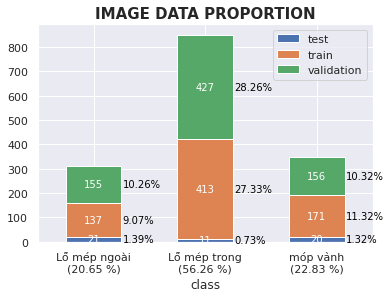

In [21]:
total_image = data_crosstab.iloc[-1,-1]
ax = data_crosstab.iloc[:-1,:-1].T.plot(kind = "bar", stacked = True, rot = 0)

percent_val = []

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    percent = 100*height/total_image

    ax.text(rect.get_x() + width - 0.25, 
            rect.get_y() + height/2, 
            int(height), 
            ha = 'center',
            va = 'center',
            color = "white",
            fontsize = 10)
    
    ax.text(rect.get_x() + width + 0.01, 
            rect.get_y() + height/2, 
            "{:.2f}%".format(percent), 
            ha = 'left',
            va = 'center',
            color = "black",
            fontsize = 10)
    
    percent_val.append(percent)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles, labels = labels)

percent_def = sum(percent_val[::2])
ax.set_xticklabels(["Lỗ mép ngoài\n(20.65 %)".format(percent_def), "Lỗ mép trong\n(56.26 %)".format(100-percent_def), "móp vành\n(22.83 %)".format(100-percent_def)])
plt.title("IMAGE DATA PROPORTION", fontsize = 15, fontweight = "bold")
plt.show()

In [22]:
class_names =training_set.class_indices
print(class_names)

{'Lỗ mép ngoài': 0, 'Lỗ mép trong': 1, 'móp vành': 2}


In [23]:
batch_size = 32
img_height = 180
img_width = 180

In [24]:
IMAGE_DIR = "/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data"
IMAGE_SIZE = (100, 100)
BATCH_SIZE = 64
SEED_NUMBER = 123

gen_args = dict(target_size = IMAGE_SIZE,
                color_mode = "grayscale",
                batch_size = BATCH_SIZE,
                class_mode = "binary",
                classes = {'Lỗ mép trong': 0, 'Lỗ ngoài': 1, 'móp vành': 2},
                shuffle = True,
                seed = SEED_NUMBER)

In [25]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [26]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [27]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9384123014211162438
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6089501607000041659
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [28]:
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
23/23 [==============================] - 386s 17s/step - loss: 1.7849 - accuracy: 0.5298 - val_loss: 0.5330 - val_accuracy: 0.7060
Epoch 2/50
23/23 [==============================] - 14s 631ms/step - loss: 0.4962 - accuracy: 0.6588 - val_loss: 0.4543 - val_accuracy: 0.7073
Epoch 3/50
23/23 [==============================] - 14s 631ms/step - loss: 0.4834 - accuracy: 0.6630 - val_loss: 0.4503 - val_accuracy: 0.7005
Epoch 4/50
23/23 [==============================] - 14s 636ms/step - loss: 0.4611 - accuracy: 0.6727 - val_loss: 0.4185 - val_accuracy: 0.7087
Epoch 5/50
23/23 [==============================] - 15s 656ms/step - loss: 0.4563 - accuracy: 0.6755 - val_loss: 0.4197 - val_accuracy: 0.7073
Epoch 6/50
23/23 [==============================] - 15s 649ms/step - loss: 0.4338 - accuracy: 0.7060 - val_loss: 0.3859 - val_accuracy: 0.7778
Epoch 7/50
23/23 [==============================] - 15s 684ms/step - loss: 0.3882 - accuracy: 0.7559 - val_loss: 0.3118 - val_accuracy: 0.8279


In [34]:
model.save('casting.h5')


In [41]:
model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/casting.h5')

In [38]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.20780326426029205
Train Accuracy 0.8765603303909302


<function matplotlib.pyplot.show(*args, **kw)>

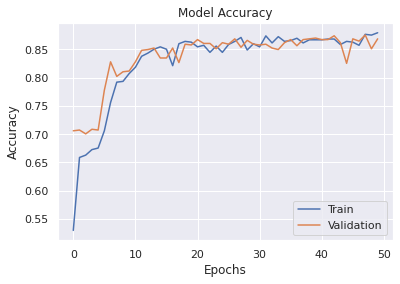

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show


1/1 [==============================] - 0s 49ms/step
Lỗ mép trong


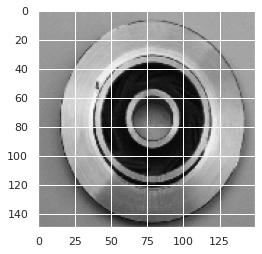

In [46]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/test/Lỗ mép trong/cast_def_0_1958.jpeg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Lỗ mép ngoài'
if round(result[0][1])==1:
  prediction='Lỗ mép trong'
if round(result[0][2])==1:
  prediction='móp vành'
print(prediction)

1/1 [==============================] - 0s 23ms/step
móp vành


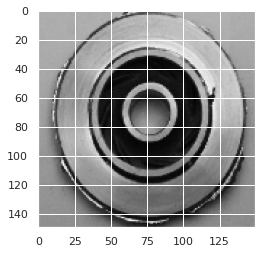

In [43]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/test/móp vành/cast_def_0_146.jpeg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Lỗ mép ngoài'
if round(result[0][1])==1:
  prediction='Lỗ mép trong'
if round(result[0][2])==1:
  prediction='móp vành'
print(prediction)

1/1 [==============================] - 0s 27ms/step
Lỗ mép trong


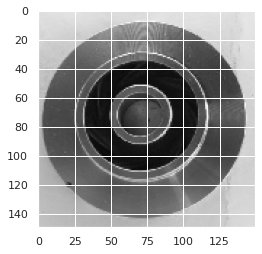

In [44]:

img=load_img("/content/drive/MyDrive/Colab Notebooks/Project cuối kì/casting_data/test/Lỗ mép ngoài/cast_def_0_138.jpeg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Lỗ mép ngoài'
if round(result[0][1])==1:
  prediction='Lỗ mép trong'
if round(result[0][2])==1:
  prediction='móp vành'
print(prediction)